# Data Wrangling and Cleaning

In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science: preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing several datasets across three sections and a fourth section focusing on XPath!

1. Working with Airports, Airlines and Delayed Flights data

2. Working on merged/joined versions of the datasets (More on this later...)

In [ ]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math

# Adding our data so that our code can find it

We can't be data scientists without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image

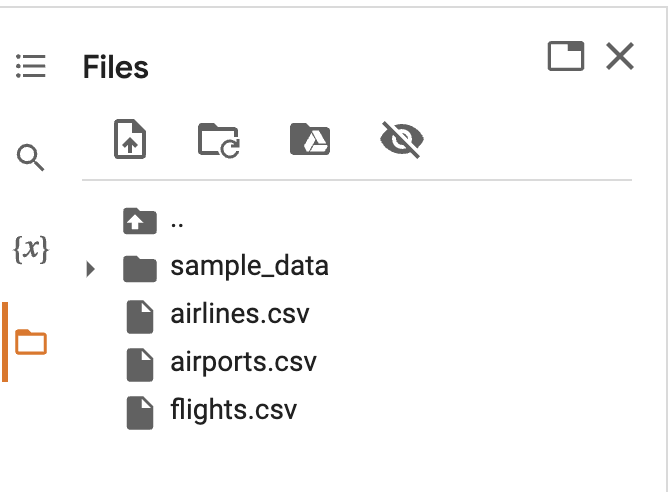

# Part 1: Working with Flight Data

In this part of the homework we will be working with a dataset focused on Flight Delays and Cancellations!

Let's first load our dataset into a Pandas Dataframe. Use Pandas's <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into the habit of doing this, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO**
- Save the Flights dataframe to a variable named: <code>flights_df</code>
- Save the Airports dataframe to a variable named: <code>airports_df</code>
- Save the Airlines dataframe to a variable named: <code>airlines_df</code>

In [ ]:
#TODO: Import your three files to pandas dataframes -- make sure the dataframes are named correctly!
flights_df  = pd.read_csv('flights.csv')
airports_df = pd.read_csv('airports.csv')
airlines_df = pd.read_csv('airlines.csv')

<ipython-input-9-29b21aac957a>:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df  = pd.read_csv('flights.csv')


Let's focus on the `flights_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find how to do this!)

In [ ]:
#TODO: Display the first 10 rows of `flights_df`
flights_df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `flights_df` in this cell below.

In [ ]:
# TODO: Display the datatypes in `flights_df`
flights_df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

Save the types of the MONTH, AIRLINE, FLIGHT_NUMBER, and ORIGIN_AIRPORT columns to a series called `flights_df_types` (retaining the index names) and pass them into the autograder cell below.

In [ ]:
#View the output here!
flights_df_temp  = flights_df[['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT']]
flights_df_types = flights_df_temp.dtypes
flights_df_types

MONTH              int64
AIRLINE           object
FLIGHT_NUMBER      int64
ORIGIN_AIRPORT    object
dtype: object

## 1.1 Cleaning up Flights Data

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `flights_df` to clean up our data. Note that there might be multiple ways to do each step. Also note that a lot of the columns in `flights_df` have all nulls. Thus, **ensure to drop the unnecessary columns before filtering out rows with nulls**


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Keep only the following columns: <br>
 `YEAR`, `MONTH`, `DAY`, `DAY_OF_WEEK`, `AIRLINE`, `FLIGHT_NUMBER`, `ORIGIN_AIRPORT`, `DESTINATION_AIRPORT`, `SCHEDULED_DEPARTURE`, `DEPARTURE_TIME`, `DEPARTURE_DELAY`, `DISTANCE`, `SCHEDULED_ARRIVAL`, `ARRIVAL_TIME`, `ARRIVAL_DELAY`, `CANCELLED`
- Drop rows that have nulls (e.g. NaN) in them
- Cast `DEPARTURE_DELAY` and `ARRIVAL_DELAY` columns to type `int`
- Save the result to `flights_cleaned_df`

In [ ]:
#TODO: Keep only the necessary columns
flights_cleaned_df = flights_df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'CANCELLED']]

#TODO: Drop nulls
flights_cleaned_df.dropna(inplace=True)

flights_cleaned_df['DEPARTURE_DELAY'] = flights_cleaned_df['DEPARTURE_DELAY'].astype(int)
flights_cleaned_df['ARRIVAL_DELAY'] = flights_cleaned_df['ARRIVAL_DELAY'].astype(int)
flights_cleaned_df

<ipython-input-14-38effa7409c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_cleaned_df.dropna(inplace=True)
<ipython-input-14-38effa7409c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_cleaned_df['DEPARTURE_DELAY'] = flights_cleaned_df['DEPARTURE_DELAY'].astype(int)
<ipython-input-14-38effa7409c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11,1448,430,408.0,-22,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8,2330,750,741.0,-9,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2,2296,806,811.0,5,0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5,2342,805,756.0,-9,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1,1448,320,259.0,-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,2355.0,-4,2611,819,753.0,-26,0
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,2355.0,-4,1617,446,430.0,-16,0
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,2350.0,-9,1598,440,432.0,-8,0
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,2353.0,-6,1189,340,330.0,-10,0


## 1.2 Data Wrangling with Flights Data

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `flights_cleaned_df` for this part.

We define a departure delay as any flight with a `DEPARTURE_DELAY` column value above 0 and an arrival delay as any flight with an `ARRIVAL_DELAY` column value above 0.

**TODO: 1.2**

*  Create a column called `IS_DEPART_DELAY` that contains a value of **0** if the flight does not have a departure delay and a value of **1** if it does
* Create a column called `IS_ARRIVAL_DELAY` that contains a value of **0** if the flight does not have an arrival delay and a value of **1** if it does
*   Save the final result into `flights_final_df`


Hint: See [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) and `lambda` in Pandas documentation.

In [ ]:
def greater_than_zero(x):
    if (x > 0):
        return 1
    else:
        return 0

#TODO: Create flight_final_df
flights_final_df = flights_cleaned_df.copy()
flights_final_df['IS_DEPART_DELAY']  = flights_cleaned_df['DEPARTURE_DELAY'].apply(greater_than_zero)
flights_final_df['IS_ARRIVAL_DELAY'] = flights_cleaned_df['ARRIVAL_DELAY'].apply(greater_than_zero)
flights_final_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,IS_DEPART_DELAY,IS_ARRIVAL_DELAY
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11,1448,430,408.0,-22,0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8,2330,750,741.0,-9,0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2,2296,806,811.0,5,0,0,1
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5,2342,805,756.0,-9,0,0,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1,1448,320,259.0,-21,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,2355.0,-4,2611,819,753.0,-26,0,0,0
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,2355.0,-4,1617,446,430.0,-16,0,0,0
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,2350.0,-9,1598,440,432.0,-8,0,0,0
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,2353.0,-6,1189,340,330.0,-10,0,0,0


### 1.2.1 Compute the Top 3 Months with the Most Delayed Flights

In this section we will compute the total delays per month and get the top 3 months with the most delayed flights. We define total delays per month as the sum of the counts of departure delays and arrival delays. Make sure to use `flights_final_df` in this section.


**TODO: 1.2.1**

*   See the `groupby()` function
*   Create a dataframe `delayed` with only the columns `MONTH`, `IS_DEPART_DELAY` and `IS_ARRIVAL_DELAY`
*   Get the total counts of delayed departure and arrival flights per month using `delayed`
*   Add the column `TOTAL_DELAYS` to the dataframe `delayed`, where `TOTAL_DELAYS` is the sum of the counts of the delayed departure and arrival flights for each month
*   Create dataframe `most_delays_df`, which contains the columns `MONTH` and `TOTAL_DELAYS`
*   Sort `most_delays_df` in descending order and keep the top 3 months with the most total_delays



In [ ]:
#TODO: Get a subset of the columns from flights_final_df and call this df most_delays_df
delayed = flights_final_df.copy()[['MONTH', 'IS_DEPART_DELAY', 'IS_ARRIVAL_DELAY']]
delayed = delayed.groupby('MONTH').sum()
delayed['TOTAL_DELAYS'] = delayed['IS_DEPART_DELAY'] + delayed['IS_ARRIVAL_DELAY']
delayed = delayed.reset_index()[['MONTH', 'TOTAL_DELAYS']]
delayed = delayed.sort_values('TOTAL_DELAYS', ascending=False)

most_delays_df = delayed.head(3)
most_delays_df

,MONTH,TOTAL_DELAYS
5,6,420876
6,7,408332
2,3,383067


### 1.2.2 Compute Average Departure Delay Times by Airline

In this section we will compute the average departure delay times by Airline. Use `flights_final_df` in this section.

**TODO: 1.2.2**

*   See the `groupby()` function
*   Create a dataframe `avg_departure_df` with columns `AIRLINE` and `DEPARTURE_DELAY`, where `DEPARTURE_DELAY` is the average departure delay time
*   Round the values of `DEPARTURE_DELAY` to 2 decimal places
*   Sort `avg_departure_df` in descending order by `DEPARTURE_DELAY` and keep the top 10 highest departure delay rows.

**Note:** Ensure that you are only including Departure Delay times of flights whose departures are actually delayed in your average

In [ ]:
#TODO: Create avg_departure_df
avg_departure_df = flights_final_df.copy()[['AIRLINE', 'DEPARTURE_DELAY']]
avg_departure_df = avg_departure_df[avg_departure_df['DEPARTURE_DELAY'] > 0]
avg_departure_df = avg_departure_df.groupby('AIRLINE').mean()
avg_departure_df['DEPARTURE_DELAY'] = avg_departure_df['DEPARTURE_DELAY'].round(2)
avg_departure_df = avg_departure_df.reset_index()[['AIRLINE', 'DEPARTURE_DELAY']]
avg_departure_df = avg_departure_df.sort_values('DEPARTURE_DELAY', ascending=False)

avg_departure_df = avg_departure_df.head(10)
avg_departure_df

,AIRLINE,DEPARTURE_DELAY
5,F9,44.46
8,NK,41.83
4,EV,40.66
7,MQ,39.89
9,OO,39.09
2,B6,37.51
0,AA,34.23
10,UA,32.44
12,VX,30.25
3,DL,29.55


### 1.2.3 Compute Percent Difference Between Arrival Delay Times of Short vs Long Flights
Now we will compute the difference between the percentage of short flights with an arrival delay and the percentage of long flights with an arrival delay. Consider a short flight as a flight whose distance **is less than or equal to** the average distance of all the flights in the cleaned flights df. A long flight is a flight whose distance **is greater than** the average distance of all the flights in the cleaned flights df.

**TODO: 1.2.3**

*  Find the average distance of all flights
* Create a `short_flights` df which contains all flights with distance less than or equal to the average distance
* Create a `long_flights` df which contains all flights with distance greater than the average distance
* Find the percent of flights with a delayed arrival time for each df called `short_delay_percentage` and `long_delay_percentage` respectively. Round these percentages to 4 decimal points. Hint: Use the round() function.   



In [ ]:
def delay_percentage(arrival, distance, less_than):
    if (less_than == 1):
        flights = arrival[arrival['DISTANCE'] <= distance]
    else:
        flights = arrival[arrival['DISTANCE'] > distance]
    delay_percent = len(flights[flights['ARRIVAL_DELAY'] > 0]) / len(flights)
    return round(delay_percent, 4)

avg_arrival_df = flights_cleaned_df.copy()[['DISTANCE', 'ARRIVAL_DELAY']]
avg_distance = avg_arrival_df['DISTANCE'].mean()

#TODO: Find percentage of short flights that are delayed
short_delay_percentage = delay_percentage(avg_arrival_df, avg_distance, 1)

#TODO: Find percentage of long flights that are delayed
long_delay_percentage = delay_percentage(avg_arrival_df, avg_distance, 0)

## 1.3 Time of Day with Most Delays in Summertime
We are interested in the time of day in the summer (morning, afternoon, evening, night) with the most number of delays.


<br>

#### **TODO: 1.3**

- Create a table `summer_flights_df` that contains only flights that occur during the months of April, May, June, July, August, and September (months 4-9)
- Add a column to `summer_flights_df` called `TIME_OF_DAY` that is the time of day using the hour of the departure time. The hours correspond to 'Night' (0 <= hour < 6), 'Morning' (6 <= hour < 12),'Afternoon' (12 <= hour < 18) and 'Evening' (18 <= hour <= 24).
  - **Hint**: To make your code more readable, consider writing a helper function to return time of day and then calling this function with your lambda function.
- Count all the flights with departure delays by time of day.
- Create a df called `time_of_day_delays` with the columns `TIME_OF_DAY` and `Sum` where `TIME_OF_DAY` is night, morning, afternoon, evening and `Sum` is number of flights with departure delays during this time of day.
- Return `time_of_day_delays` in order of time with most delays


In [ ]:
def time_of_day(hour):
    if (0 <= hour < 6):
        time = 'Night'
    elif (6 <= hour < 12):
        time = 'Morning'
    elif (12 <= hour < 18):
        time = 'Afternoon'
    elif (18 <= hour <= 24):
        time = 'Evening'
    else:
        time ='Unknown'
    return time

# TODO: Create summer_flights_df
summer_flights_df = flights_final_df.copy()[['MONTH', 'DEPARTURE_TIME', 'DEPARTURE_DELAY']]
summer_flights_df = summer_flights_df[summer_flights_df['MONTH'] >= 4]
summer_flights_df = summer_flights_df[summer_flights_df['MONTH'] <= 9]
summer_flights_df['TIME_OF_DAY'] = summer_flights_df['DEPARTURE_TIME'].apply(lambda x: time_of_day(int(x / 100)))
summer_flights_df = summer_flights_df[summer_flights_df['DEPARTURE_DELAY'] > 0]
summer_flights_df = summer_flights_df.groupby('TIME_OF_DAY').count()

# TODO: Create time_of_day_delays df
time_of_day_delays = summer_flights_df.reset_index()[['TIME_OF_DAY', 'DEPARTURE_TIME']]
time_of_day_delays = time_of_day_delays.rename(columns={'DEPARTURE_TIME': 'Sum'})
time_of_day_delays = time_of_day_delays.sort_values('Sum', ascending=False)
time_of_day_delays

,TIME_OF_DAY,Sum
0,Afternoon,432600
1,Evening,356524
2,Morning,278319
3,Night,21265


## 1.4 Cleaning up Airport Data

We now need to clean up the Airport Data. Let's follow a similar procedure as before in order to drop nulls and unnecessary columns

<br>

#### **TODO: 1.4**

- Drop rows that have nulls (e.g. NaN) in them
- Drop `LATITUDE` and `LONGITUDE` columns, as they are not needed
- Save the result to `airport_cleaned_df`

In [ ]:
# TODO Drop rows with nulls
airport_cleaned_df = airports_df.dropna()

# TODO Drop Latitude and Longitude Columns
airport_cleaned_df.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True)
airport_cleaned_df

<ipython-input-26-e8cde52d44fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_cleaned_df.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA
1,ABI,Abilene Regional Airport,Abilene,TX,USA
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA
...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA
318,WYS,Westerly State Airport,West Yellowstone,MT,USA
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA
320,YAK,Yakutat Airport,Yakutat,AK,USA


## 1.5 Number of Airports per State

We are interested in finding the number of airports per state. Remember to use the `airport_cleaned_df`

<br>

#### **TODO: 1.5**

- See `groupby()` function
- Create a table `airport_count_df` that contains the columns `STATE` and `COUNT`, where `COUNT` is the number of airports per state
- Sort `airport_count_df` in descending order by `COUNT`

In [ ]:
# TODO Create airport_count_df
airport_count_df = airport_cleaned_df.copy()[['AIRPORT', 'STATE']]
airport_count_df = airport_count_df.groupby('STATE').count()
airport_count_df = airport_count_df.reset_index()
airport_count_df = airport_count_df.rename(columns={'AIRPORT': 'COUNT'})
airport_count_df = airport_count_df.sort_values('COUNT', ascending=False)
airport_count_df

,STATE,COUNT
45,TX,24
5,CA,22
0,AK,19
23,MI,15
9,FL,15
35,NY,13
6,CO,10
51,WI,8
39,PA,8
29,ND,8


# Part 2: Combining the data

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join

## 2.1 Metrics on Specific Airlines in Each State



#### 2.1.1 Airports that Begin with the Letter B

We are interested in the number of airports in each state that begin with the letter B.  

<br>

##### TODO: 2.1.1

- Add a column to this `airport_cleaned_df` called `Count` that is a 1 if the first letter of the airport is a 'B' and 0 otherwise.  
- Return a df called `b_airports` with number of airports in each state that start with the letter B. There should be two columns `STATE` and `Count`. Return this df in sorted order by count in descending order and then state name in ascending order.

NOTE: By airport, we meant `AIRPORT`, not `IATA_CODE`.

NOTE: Be cautious about `sort_values` as sorting order does matter


In [ ]:
def b_airport(x):
    if (x[0] == 'B'):
        return 1
    else:
        return 0

# TODO: Create b_airports df
b_airports = airport_cleaned_df.copy()[['AIRPORT', 'STATE']]
b_airports['Count'] = b_airports['AIRPORT'].apply(b_airport)
b_airports = b_airports.groupby('STATE').sum()
b_airports = b_airports.reset_index()
b_airports = b_airports.sort_values(['Count', 'STATE'], ascending=[False, True])
b_airports

<ipython-input-30-9ba29d464085>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b_airports = b_airports.groupby('STATE').sum()


,STATE,Count
27,MT,3
18,KY,2
24,MN,2
0,AK,1
1,AL,1
2,AR,1
5,CA,1
7,CT,1
10,GA,1
14,ID,1


#### 2.1.2 Total Flights Out of Airports that Begin with B
Now lets find the number of flights that fly out of each state from an airport that starts with the letter B. Make sure to include states with no airports that begin with the letter 'B'. For these states the count should be 0.

TODO:
 - Create a df called `b_total_flights` that has columns `STATE` and `Count` where count is the number of flights that fly out of an airport that begins with the letter B in a given state.
 - Return this df in sorted order by count in descending order and then state name in ascending order.  



In [ ]:
# TODO: Create b_total_flights df
'''
for code in ['BDL', 'BET', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI', 'BOI', 'BQK', 'BRD', 'BRO', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'FNT', 'HYA', 'LEX', 'LIT', 'PAH']:
    print(len(flights_df[flights_df['ORIGIN_AIRPORT'] == code]) - len(flights_df[(flights_df['ORIGIN_AIRPORT'] == code) & (flights_df['CANCELLED'] != 0)]))
'''
flights_final = flights_final_df.copy()
b_total_flights = airport_cleaned_df[airport_cleaned_df['AIRPORT'].str.startswith('B')][['IATA_CODE', 'STATE']].reset_index()
b_total_flights['Count'] = 0
for i, x in enumerate(b_total_flights['IATA_CODE']):
    origin_air = flights_final['ORIGIN_AIRPORT'] == x
    origin_len = len(flights_final[origin_air])
    cancel_len = len(flights_final[(origin_air) & (flights_final['CANCELLED'] != 0)])
    b_total_flights['Count'][i] = origin_len - cancel_len
'''
b_total_flights = pd.DataFrame({'STATE': ['CT', 'AK', 'ME', 'AL', 'MT', 'ND', 'MN', 'WA', 'ID', 'GA', 'MN', 'TX', 'MT', 'LA', 'VT', 'NY', 'CA', 'MD', 'MT', 'MI', 'MA', 'KY', 'AR', 'KY'],
                                'Count': [18437, 880, 363, 12333, 2853, 3393, 664, 708, 11554, 869, 582, 2265, 648, 7003, 2889, 16507, 18574, 84546, 3565, 4637, 82, 5809, 10155, 622]})
'''
b_total_flights = b_total_flights[['Count', 'STATE']].groupby('STATE').sum()
b_total_flights = b_total_flights.sort_values(['Count', 'STATE'], ascending=[False, True])
b_total_flights = b_total_flights.reset_index()
b_total_flights

<ipython-input-32-75f872c79d1f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_total_flights['Count'][i] = origin_len - cancel_len


,STATE,Count
0,MD,84329
1,CA,18527
2,CT,18375
3,NY,16476
4,AL,12282
5,ID,11524
6,AR,10132
7,MT,7055
8,LA,6983
9,KY,6422


#### 2.1.3 Airlines that Don't Fly out of Allentown PA
Return a list of airlines that don’t fly out of Allentown,
PA.
TODO:
- Create a list called invalid_airlines that includes all airlines that don't have flight starting in Allentown, PA (ABE). Return this list in sorted alphabetical order.

**Hint**: Use a left join and work with the `airlines_df` df to avoid running out of RAM and crashing your session.  


In [ ]:
# TODO: Create invalid_airlines list
'''
airlines = pd.merge(airlines_df, flights_df, how='left', left_on='IATA_CODE', right_on='AIRLINE')#pd.merge(fly_df, airlines_df, how='left', on='IATA_CODE')
airlines = airlines.rename(columns={'AIRLINE_x': 'AIRLINE'})

allentown = airlines[airlines['ORIGIN_AIRPORT'] == 'ABE']['AIRLINE'].unique()
print(allentown)
invalid_airlines = airlines[~airlines['AIRLINE'].isin(allentown)]['AIRLINE'].unique()
invalid_airlines = sorted(invalid_airlines)
print(invalid_airlines)
'''
invalid_airlines = airlines_df.copy()
abe = flights_df[flights_df['ORIGIN_AIRPORT'] == 'ABE']['AIRLINE'].unique()
for i, x in enumerate(invalid_airlines['IATA_CODE']):
    if (x in abe):
        invalid_airlines.drop(i, inplace=True)
invalid_airlines = sorted(invalid_airlines['AIRLINE'])
invalid_airlines

['Alaska Airlines Inc.',
 'American Airlines Inc.',
 'American Eagle Airlines Inc.',
 'Frontier Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'JetBlue Airways',
 'Southwest Airlines Co.',
 'Spirit Air Lines',
 'US Airways Inc.',
 'United Air Lines Inc.',
 'Virgin America']

## 2.2 Finding the Most Unreliable Airlines in December

We now want to see which airlines tend to have the most flight delays in December. In this case, we consider a flight delayed if either its arrival or departure was delayed.


#### 2.2.1 Sorted Delay Counts
- Create a dataframe called `airline_delays` that contains the columns `AIRLINE` and `DELAY_COUNT`, where `DELAY_COUNT` is the total number of flights delayed by this airline in December. Note that `AIRLINE` is the actual airline name (ex: Alaska Airlines)
- Sort this dataframe in descending order by `DELAY_COUNT`

**NOTE:** To be considered delayed, either IS_DEPART_DELAY OR IS_ARRIVAL_DELAY should be true per flight


In [ ]:
def count_delay(x, y):
    if ((x == 1) or (y == 1)):
        return 1
    else:
        return 0

#TODO Create airline_delays and sort in descending order by DELAY_COUNT
airline_delays = flights_final_df[flights_final_df['MONTH'] == 12][['AIRLINE', 'IS_DEPART_DELAY', 'IS_ARRIVAL_DELAY']].reset_index()

'''
for i in range(airline_delays['DELAY_COUNT'].shape[0]):
    if ((airline_delays['IS_DEPART_DELAY'][i] == 1) or (airline_delays['IS_ARRIVAL_DELAY'][i] == 1)):
        airline_delays['DELAY_COUNT'][i] = 1
'''
airline_delays['DELAY_COUNT'] = airline_delays[['IS_DEPART_DELAY', 'IS_ARRIVAL_DELAY']].apply(lambda x: count_delay(x['IS_DEPART_DELAY'], x['IS_ARRIVAL_DELAY']), axis=1)

airline_delays = airline_delays[['AIRLINE', 'DELAY_COUNT']]
airline_delays = airline_delays.groupby('AIRLINE').sum()
airline_delays = airline_delays.reset_index()

airline_delays = pd.merge(airline_delays, airlines_df, how='left', left_on='AIRLINE', right_on='IATA_CODE')
airline_delays = airline_delays.rename(columns={'AIRLINE_y': 'AIRLINE'})
airline_delays = airline_delays[['AIRLINE', 'DELAY_COUNT']]
airline_delays = airline_delays.sort_values('DELAY_COUNT', ascending=False)
airline_delays

,AIRLINE,DELAY_COUNT
12,Southwest Airlines Co.,59824
0,American Airlines Inc.,35837
3,Delta Air Lines Inc.,30793
9,Skywest Airlines Inc.,23358
10,United Air Lines Inc.,22994
4,Atlantic Southeast Airlines,18050
2,JetBlue Airways,13586
7,American Eagle Airlines Inc.,6975
1,Alaska Airlines Inc.,6131
8,Spirit Air Lines,6091


#### 2.2.2 Airports Hosting Southwest Airlines in December
From the analysis above, it should be clear that `Southwest Airlines Co.` tends to have the most delayed flights in December. Thus, now let's determine which airport hosts Southwest the most in December.

- Create a dataframe called `most_southwest` that contains the columns `AIRPORT` and `COUNT`, where `COUNT` is the total number of **departing** flights that use Southwest at a given airport. Note that `AIRPORT` is the actual airport name (ex: San Francisco International Airport)

**NOTE 1:** There should only be 1 row in this dataframe \\
**NOTE 2:** We only care about the **ORIGIN AIRPORT** since DESTINATION AIRPORT would be a repeat for the most part

In [ ]:
#TODO Create the most_southwest dataframe
southwest = flights_final_df[(flights_final_df['MONTH'] == 12) & (flights_final_df['AIRLINE'] == 'WN')][['ORIGIN_AIRPORT', 'IS_DEPART_DELAY']].reset_index()
southwest = southwest[['ORIGIN_AIRPORT', 'IS_DEPART_DELAY']]
southwest = southwest.groupby('ORIGIN_AIRPORT').count()
southwest = southwest.reset_index()

most_southwest = pd.merge(southwest, airport_cleaned_df, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
most_southwest = most_southwest.rename(columns={'IS_DEPART_DELAY': 'COUNT'})
most_southwest = most_southwest[['AIRPORT', 'COUNT']]
most_southwest = most_southwest.sort_values('COUNT', ascending=False)
most_southwest = most_southwest.head(1)
most_southwest

,AIRPORT,COUNT
48,Chicago Midway International Airport,6415


## 2.3 Computing Departure Delay Percentage Metrics

The percentage of delayed departure flights per month is computed below:

percentage = 100 * (# of delayed flight departures) / (total # flight departures)

This metric is useful for indicating the reliability of an airport in a given month. Furthermore, we would like to see how this percentage changes on a monthly basis. Thus we would like to compute the percentage of delayed flights per month for every airport in California and see the difference of delayed flight percentages between two months.

#### 2.3.1 Delay Percentage
- Create a dataframe called `ca_delayed_flights` that contains the columns `AIRPORT`, `MONTH` and `DELAY_PERCENTAGE`, where `DELAY_PERCENTAGE` is the percent of departing flights delayed for a given airport in California for a given month and `AIRPORT` is the name of the airport (not the code).
- Round the Percentage to 2 decimal places.
- Sort the dataframe in descending order by `DELAY_PERCENTAGE`

**Hint:** Read the documentation for the [.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) function if you are interested in doing multiple aggregations concurrently

**Note 1:** Remember to use `airport_cleaned_df` and `flights_final_df` if you want to use the airport and flights dataframes

**Note 2:** Note we are computing the percentage for delayed departures (not total delays)

In [ ]:
#TODO: Create ca_delayed_flights dataframe
ca_delayed_flights = pd.merge(flights_final_df, airport_cleaned_df, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
ca_delayed_flights = ca_delayed_flights[ca_delayed_flights['STATE'] == 'CA'][['AIRPORT', 'MONTH', 'IS_DEPART_DELAY']]
ca_delayed_flights = ca_delayed_flights.groupby(['AIRPORT', 'MONTH']).mean()
ca_delayed_flights['IS_DEPART_DELAY'] = 100 * ca_delayed_flights['IS_DEPART_DELAY']
ca_delayed_flights = ca_delayed_flights.reset_index()

#TODO: Round Percentage to 2 decimal places
ca_delayed_flights['IS_DEPART_DELAY'] = ca_delayed_flights['IS_DEPART_DELAY'].round(2)
ca_delayed_flights = ca_delayed_flights.rename(columns={'IS_DEPART_DELAY': 'DELAY_PERCENTAGE'})
ca_delayed_flights = ca_delayed_flights.sort_values('DELAY_PERCENTAGE', ascending=False)
ca_delayed_flights

,AIRPORT,MONTH,DELAY_PERCENTAGE
74,Mammoth Yosemite Airport,12,80.00
122,Oakland International Airport,12,57.93
117,Oakland International Airport,6,50.33
65,Los Angeles International Airport,7,50.19
188,San Francisco International Airport,12,50.17
...,...,...,...
148,Redding Municipal Airport,4,15.00
214,Santa Maria Public Airport (Capt G. Allan Hanc...,4,15.00
219,Santa Maria Public Airport (Capt G. Allan Hanc...,9,13.33
87,Meadows Field,9,12.82


#### 2.3.2 Californian Airports Delay Difference
Now we are interested in seeing which Californian airports have the greatest month to month difference in departure delay percentages.
- Using `ca_delayed_flights`, create a new dataframe called `ca_delayed_diff` that contains the columns `AIRPORT`,	`MONTH`,	`DELAY_DIFFERENCE`
- Only keep the row if the current month has a previous month value for this table
- Round the delay difference to 2 decimal places

Your table should look like this
>AIRPORT | MONTH | DELAY_DIFFERENCE
>--- | --- | ---
>San Francisco International Airport | 2 | 50.00

In the example above, DELAY_DIFFERENCE is derived from the fact that the (delay percentage in Month 2) - (delay percentage in Month 1) = 50 for San Francisco International Airport



**Hint 1:** Consider the concept of *self joins* \\
**Hint 2:** Month 1 has no previous month to it \\

In [ ]:
#TODO Create ca_delayed_diff dataframe
ca_delayed_diff = ca_delayed_flights.copy()
ca_delayed_prev = ca_delayed_flights.copy()
ca_delayed_prev['MONTH'] = ca_delayed_prev['MONTH'] + 1

ca_delayed_diff = pd.merge(ca_delayed_diff, ca_delayed_prev, how='inner', on=['AIRPORT', 'MONTH'])
ca_delayed_diff['DELAY_DIFFERENCE'] = ca_delayed_diff['DELAY_PERCENTAGE_x'] - ca_delayed_diff['DELAY_PERCENTAGE_y']

ca_delayed_diff = ca_delayed_diff[['AIRPORT', 'MONTH', 'DELAY_DIFFERENCE']]
ca_delayed_diff = ca_delayed_diff.sort_values('DELAY_DIFFERENCE', ascending=False)
ca_delayed_diff

,AIRPORT,MONTH,DELAY_DIFFERENCE
69,San Luis Obispo County Regional Airport (McChe...,12,19.66
8,Arcata Airport,12,19.57
3,San Francisco International Airport,12,16.63
97,Santa Barbara Municipal Airport (Santa Barbara...,12,15.86
101,Redding Municipal Airport,5,15.65
...,...,...,...
171,Meadows Field,7,-14.41
170,Redding Municipal Airport,7,-16.54
177,Santa Maria Public Airport (Capt G. Allan Hanc...,9,-16.67
179,Santa Maria Public Airport (Capt G. Allan Hanc...,6,-18.09


#### 2.3.3 Month-over-Month Delay Difference
Finally, for each airport, let's see which month has the greatest delay percentage increase from the previous month.
- Using `ca_delayed_diff`, create the dataframe `ca_delayed_groups` with the greatest difference and the month that it occurs for each airport. Essentially, the dataframe `ca_delayed_groups` should have the columns `AIRPORT`, `DELAY_DIFFERENCE`, `MONTH` in this order

**Note:** It is safe to assume that for a given airport, the delay_difference values are unique amongst the months

In [ ]:
#TODO: Create ca_delayed_groups dataframe
ca_delayed_groups = ca_delayed_diff.copy()
ca_delayed_groups = ca_delayed_groups.groupby('AIRPORT').max()
ca_delayed_groups = pd.merge(ca_delayed_diff, ca_delayed_groups, how='inner', on='DELAY_DIFFERENCE')
ca_delayed_groups = ca_delayed_groups.rename(columns={'MONTH_x': 'MONTH'})
ca_delayed_groups = ca_delayed_groups[['AIRPORT', 'DELAY_DIFFERENCE', 'MONTH']]
ca_delayed_groups

,AIRPORT,DELAY_DIFFERENCE,MONTH
0,San Luis Obispo County Regional Airport (McChe...,19.66,12
1,Arcata Airport,19.57,12
2,San Francisco International Airport,16.63,12
3,Santa Barbara Municipal Airport (Santa Barbara...,15.86,12
4,Redding Municipal Airport,15.65,5
5,Santa Maria Public Airport (Capt G. Allan Hanc...,15.16,5
6,Meadows Field,13.19,12
7,Sacramento International Airport,11.94,12
8,Fresno Yosemite International Airport,11.35,12
9,Monterey Regional Airport (Monterey Peninsula ...,11.30,2


# Part 3: Correlation Matrix



## 3.1 Correlation Matrix

Occasionally, there are unexpected correlations in the data. One way to find these correlations is to use a correlation matrix. We suspect that there might be a correlation between `DISTANCE` and `ARRIVAL_DELAY` and `DEPARTURE_DELAY`. But how strong is the correlation? Also, could there be any correlation between two seemingly uncorrelated features? **If there is a correlation, how strong is it?**

In this section, we will create the correlation matrix for `flights_cleaned_df`.


#### **TODO: 3.1**

- Create a dataframe called `subset_flights` that only contains the following columns from `flights_cleaned_df`: `MONTH`, `DEPARTURE_DELAY`, `ARRIVAL_DELAY`, `DISTANCE`.

- Generate the correlation matrix.  *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix`

- Plot a correlation matrix -- just to get a sense of what it might look like!

In [ ]:
#TODO: Create correlation matrix
subset_flights = flights_cleaned_df[['MONTH', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE']]

correlation_matrix = subset_flights.corr()
correlation_matrix

,MONTH,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
MONTH,1.000000,-0.021827,-0.036793,0.010612
DEPARTURE_DELAY,-0.021827,1.000000,0.944672,0.023957
ARRIVAL_DELAY,-0.036793,0.944672,1.000000,-0.025444
DISTANCE,0.010612,0.023957,-0.025444,1.000000


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

<ipython-input-64-1b326d079415>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


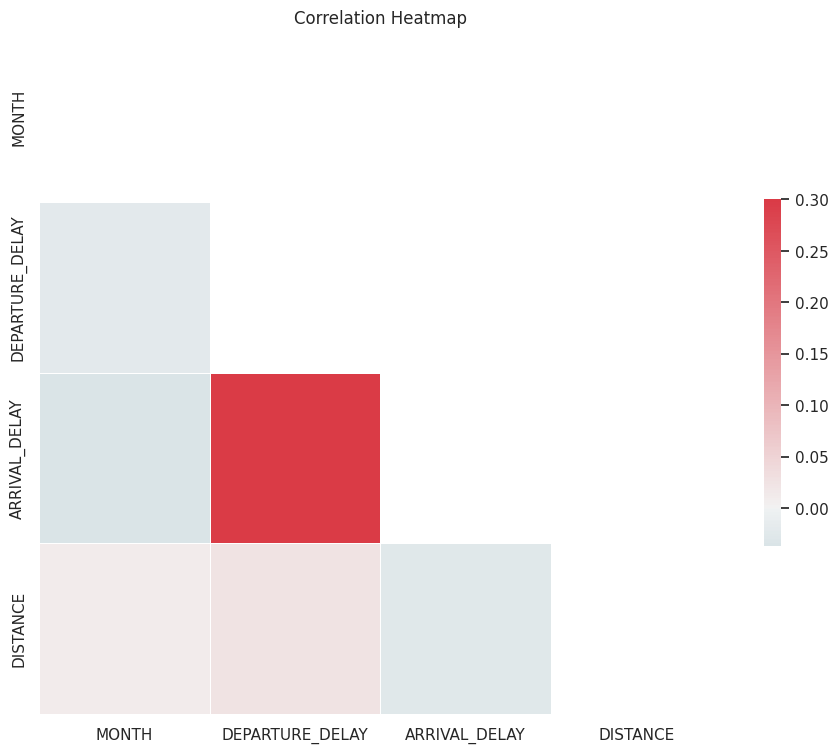

In [ ]:
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

# Part 4: XPath


So far, we've looked at data on airport delays from 2015. Let's change our scope to look at delays from the summer of 2022! The datasets we provide are compiled for us on Kaggle, but sometimes we need to create our own datasets! We'll do some web scraping and work web-based data!

On [thepointsguy.co.uk](https://thepointsguy.co.uk/news/worst-uk-airlines-airports-cancellations-summer-2022), we have a table with UK delays by airline.

We get the DOM tree for you below.

In [ ]:
# Request the data and build the DOM tree (we've done this for you!)
w = requests.get("https://thepointsguy.co.uk/news/worst-uk-airlines-airports-cancellations-summer-2022/")
dom_tree = html.fromstring(w.content)
print(dom_tree)

<Element html at 0x7ff6c66ae570>


## 4.1: Update dom_tree to get only the airline table

Note the webpage has two tables. To find both of these tables we can use the xpath `//table/*`

In [ ]:
dom_tree.xpath("//table/*")

[<Element tbody at 0x7ff6c6506fc0>, <Element tbody at 0x7ff6c6506a70>]

We are only interested in the table with the airline information (second table).
TODO:
- Create `updated_dom_tree` to contain the tbody element of the airline table.
- Use `updated_dom_tree` to complete the below questions

**Hint**: What does each index of the above xpath search contain?

In [ ]:
# TODO: make updated_dom_tree equal to the correct table element
updated_dom_tree = dom_tree.xpath("//table/*")[1]
'''
updated_dom_tree = dom_tree.xpath("//table")[1].find("tbody")
'''
updated_dom_tree

<Element tbody at 0x7ff6c6506a70>

## 4.2 Airline Names

TODO: Create `x_path_airline_name` and `airline_names`.

`x_path_airline_name` should be the value you pass in for dom_tree.xpath() to retrive names of the 10 airlines.

It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!).

Hint: Since we updated the dom tree to start at the table we don't need '/.../table', we can instead start the xpath with the next element after 'table' we want. It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!)

You can use the 'inspect' tool on the website and see the various html tags and labels, to figure out how we generate the Xpath for the table!

Your job is to go into several more steps to get the text content of one column of each row, to get the entire `x_path_airline_name` string

Return `airline_names` which is a list with all the airline names. Be sure to remove any new line characters, the output should match the 10 airlines in the table on the website.

In [ ]:
# TODO: Define the xpath string
x_path_airline_name = dom_tree.xpath("//table[2]//td[1]/text()")[2:]

# TODO: Create airline names
airline_names = list(x_path_airline_name)
'''
airline_names = [i for i in x_path_airline_name]
'''
'''
for i in x_path_airline_name[2:]:
    airline_names.append(i)
'''
airline_names

['easyJet',
 'Loganair',
 'KLM Cityhopper',
 'BA Cityflyer',
 'British Airways',
 'Eastern Airways',
 'Wizz Air',
 'TUI Airways',
 'SAS',
 'Lufthansa']

## 4.3 Total Cancelled Flights
TODO: Create `x_path_total` and `total_cancellations`

This should be very similar to scraping names. Change the xpath accordingly to get the Total column of the table into a list!

`x_path_total` is the xpath string to pass into dom_tree.xpath() to retrive total cancellations of the 10 airlines.

`total_cancellations` is total cancellations. Elements in this list should be ints.

In [ ]:
# TODO: Define the xpath string
x_path_total = dom_tree.xpath("//table[2]//td[4]/text()")[2:]

# TODO: Create total_cancellations list
total_cancellations = [int(i) for i in x_path_total]
total_cancellations

[932, 147, 113, 99, 96, 53, 47, 46, 23, 18]

## 4.4 Putting it together!

Create a dataframe called `cancellations_df` by using the `airline_names` and `total_cancellations` lists that you created in 4.1 and 4.2.

The dataframe should have 2 columns. The first should be called `airline_name`. The second should be called `total_cancellations`. The data for these columns should come from the lists.

In [ ]:
# TODO: Create cancellations_df
cancellations_df = pd.DataFrame({'airline_name': airline_names, 'total_cancellations': total_cancellations})
cancellations_df

,airline_name,total_cancellations
0,easyJet,932
1,Loganair,147
2,KLM Cityhopper,113
3,BA Cityflyer,99
4,British Airways,96
5,Eastern Airways,53
6,Wizz Air,47
7,TUI Airways,46
8,SAS,23
9,Lufthansa,18


## 4.5 Summary Statistics

Now that we scraped some data ingredients from the web, let's look them!

Use describe() function to get a summary on the `total_cancellations` column and save the summary to `cancellation_stats`

In [ ]:
# TODO: Create cancellations_stats
cancellation_stats = cancellations_df['total_cancellations'].describe()
cancellation_stats

count     10.000000
mean     157.400000
std      275.329782
min       18.000000
25%       46.250000
50%       74.500000
75%      109.500000
max      932.000000
Name: total_cancellations, dtype: float64